In [2]:
import matplotlib.pyplot as plt
import polars as pl
import scipy
import seaborn as sns

from udonpred_benchmarking.constants import DATA_DIR
from udonpred_benchmarking.plots import set_theme

In [3]:
protein_df = pl.read_csv(DATA_DIR / "per_protein_performance.csv")
protein_stats = pl.read_csv(DATA_DIR / "per_protein_stats.csv")
df = protein_df.join(protein_stats, on="ID")

set_theme()

In [4]:
(
    df
    .filter(pl.col("metric") == "spearman")
    .pivot("method", index="ID", values="value")
    .drop("ID")
    .to_pandas()
    .corr(method="spearman")
)

,UdonPred,SETH,PUNCH2,flDPnn,AlphaFold2-pLDDT,AlphaFold3-pLDDT,ODiNPred
UdonPred,1.000000,0.855076,0.745784,0.459133,0.761345,0.720813,0.652838
SETH,0.855076,1.000000,0.713721,0.420119,0.738952,0.709333,0.612365
PUNCH2,0.745784,0.713721,1.000000,0.515829,0.704778,0.666851,0.719304
flDPnn,0.459133,0.420119,0.515829,1.000000,0.431363,0.409515,0.543628
AlphaFold2-pLDDT,0.761345,0.738952,0.704778,0.431363,1.000000,0.862474,0.609534
AlphaFold3-pLDDT,0.720813,0.709333,0.666851,0.409515,0.862474,1.000000,0.577658
ODiNPred,0.652838,0.612365,0.719304,0.543628,0.609534,0.577658,1.000000


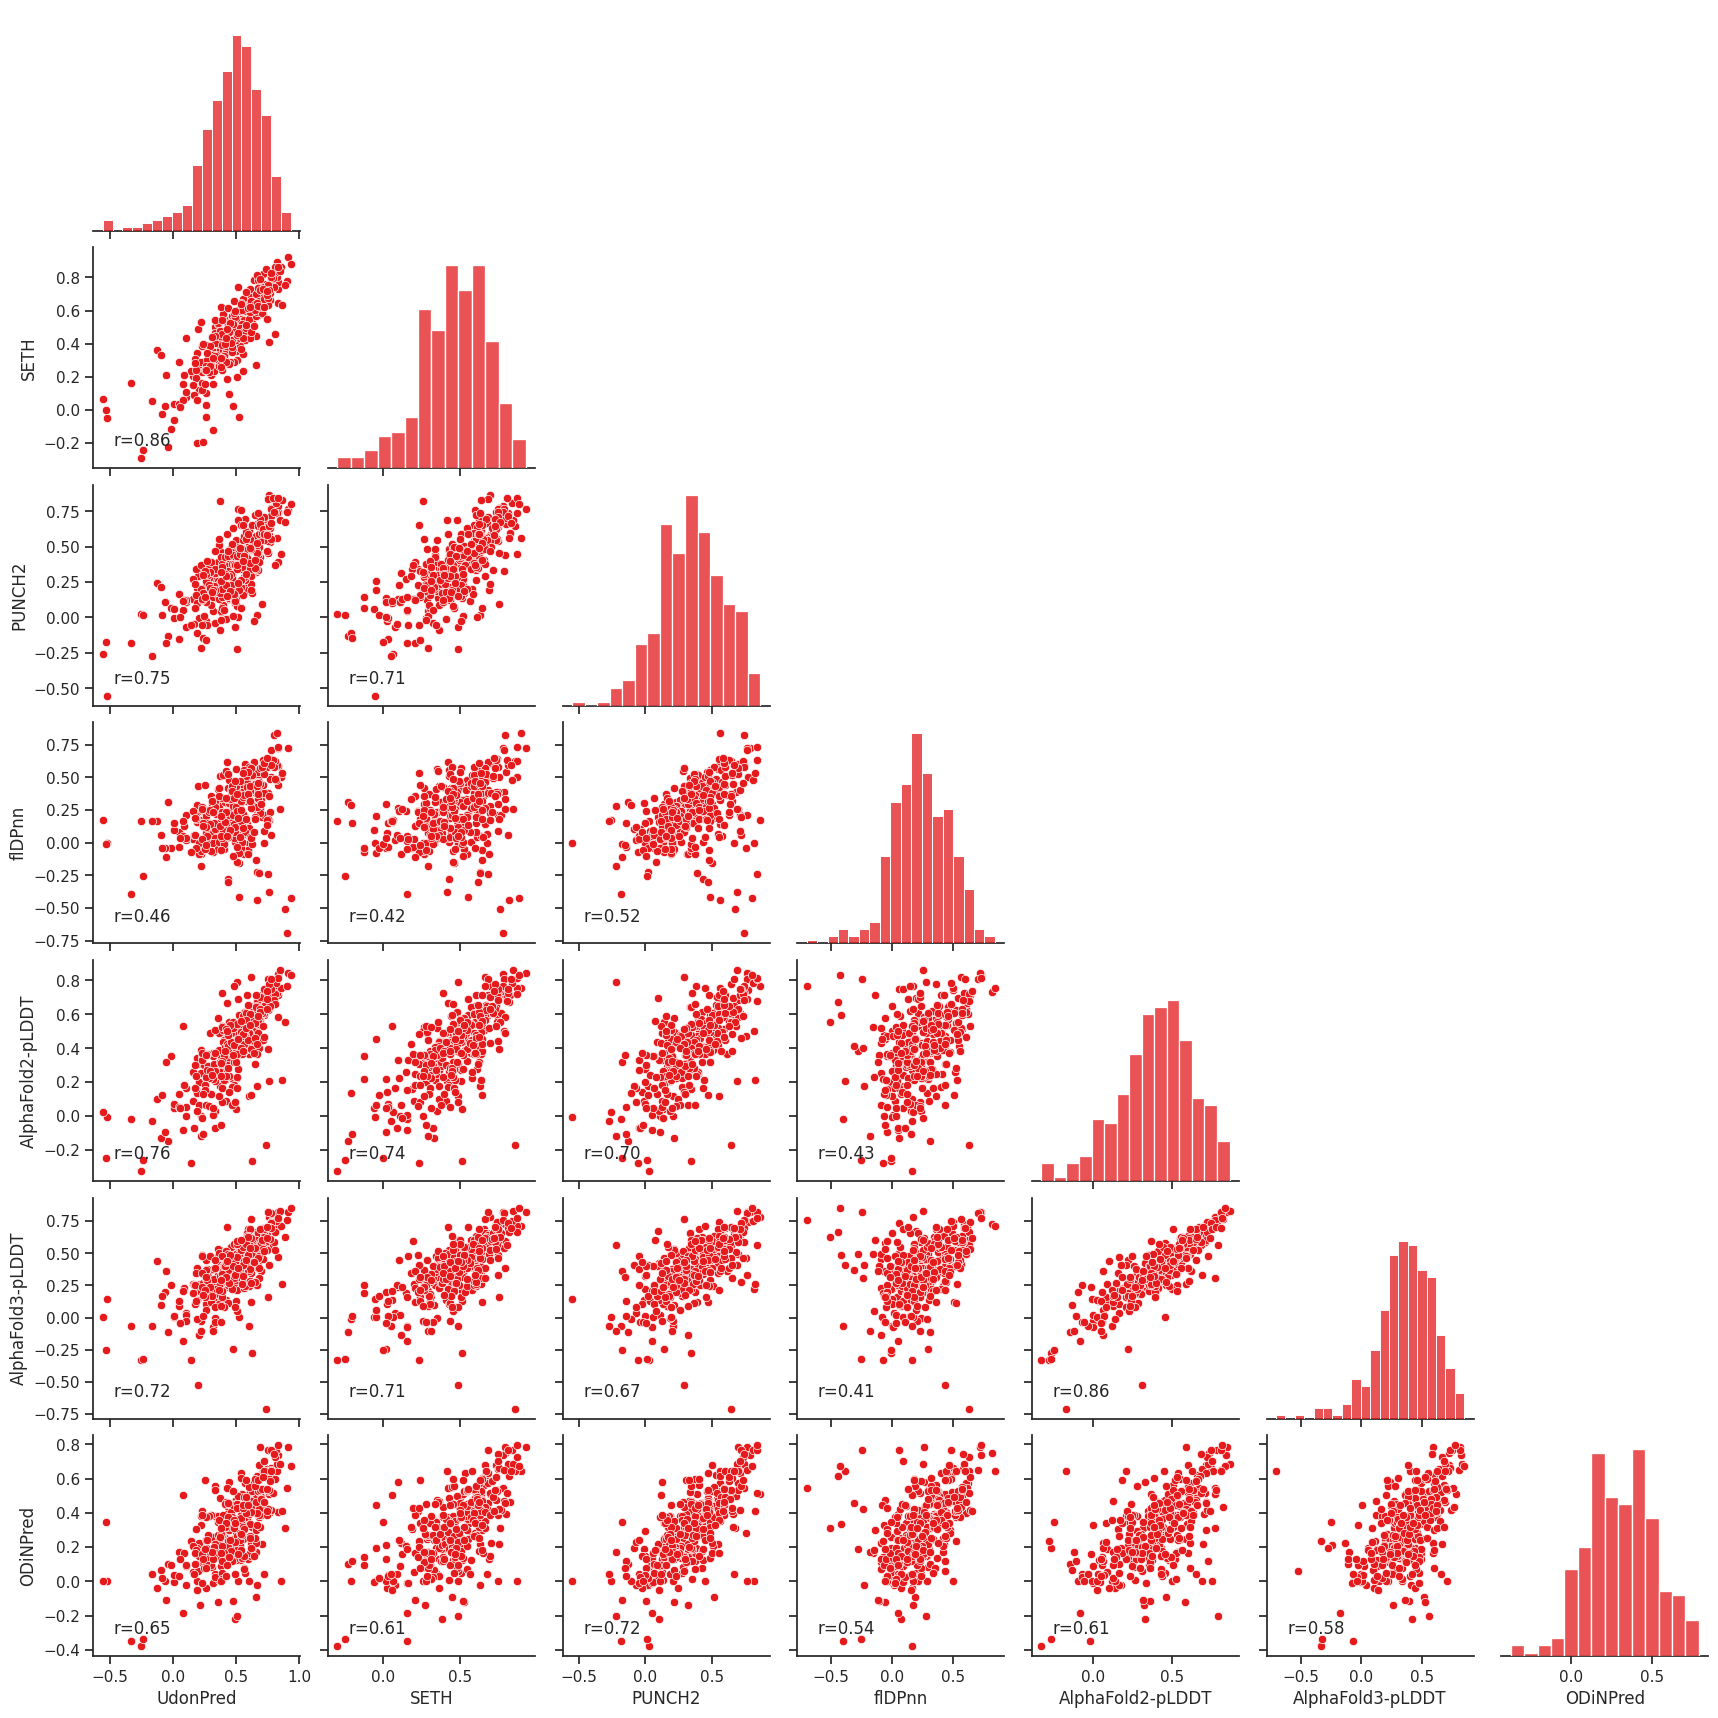

In [5]:
def annotate(x, y, **kws):
    spearman_r = scipy.stats.spearmanr(x, y).statistic
    ax = plt.gca()
    ax.text(.1, .1, f"r={spearman_r:.2f}", transform=ax.transAxes)

g = sns.pairplot(
    df
    .filter(pl.col("metric") == "spearman")
    .pivot("method", index="ID", values="value")
    .drop("ID")
    .to_pandas(),
    corner=True,
)
g.map_lower(annotate)